In [318]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1, as_frame=False)

In [320]:
X, y = mnist.data, mnist.target

In [322]:
from sklearn.model_selection import StratifiedShuffleSplit

strat_object = StratifiedShuffleSplit(n_splits=1, train_size=20000, test_size=3000, random_state=42)

for train_index, test_index in strat_object.split(X, y):
    X_train_subset = X[train_index]
    y_train_subset = y[train_index]
    X_test_subset = X[test_index]
    y_test_subset = y[test_index]

# **K-Nearest Neighbors Randomized Search**

In [5]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import randint
import joblib
import json
import time

param_dist = {
    'weights': ["uniform", "distance"],
    'n_neighbors': randint(2, 16)
}

scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision_macro',
    'recall': 'recall_macro',
    'f1': 'f1_macro'
}

knn_clf = KNeighborsClassifier()
knn_random_search = RandomizedSearchCV(knn_clf, param_distributions=param_dist, n_iter=15, cv=3, verbose=3, scoring=scoring, refit='accuracy', random_state=42)

knn_random_start_time = time.time()
knn_random_search.fit(X_train_subset, y_train_subset)
knn_random_end_time = time.time()

joblib.dump(knn_random_search, 'knn_random_search.pkl')

knn_time_data = {
    'knn_random_start_time': knn_random_start_time,
    'knn_random_end_time': knn_random_end_time
}

with open('knn_times.json', 'w') as f:
    json.dump(knn_time_data, f)

Fitting 3 folds for each of 15 candidates, totalling 45 fits
[CV 1/3] END n_neighbors=8, weights=distance; accuracy: (test=0.953) f1: (test=0.953) precision: (test=0.954) recall: (test=0.952) total time=   3.3s
[CV 2/3] END n_neighbors=8, weights=distance; accuracy: (test=0.949) f1: (test=0.949) precision: (test=0.950) recall: (test=0.948) total time=   2.9s
[CV 3/3] END n_neighbors=8, weights=distance; accuracy: (test=0.955) f1: (test=0.955) precision: (test=0.956) recall: (test=0.954) total time=   2.9s
[CV 1/3] END n_neighbors=14, weights=uniform; accuracy: (test=0.943) f1: (test=0.943) precision: (test=0.945) recall: (test=0.942) total time=   3.2s
[CV 2/3] END n_neighbors=14, weights=uniform; accuracy: (test=0.940) f1: (test=0.940) precision: (test=0.942) recall: (test=0.939) total time=   3.4s
[CV 3/3] END n_neighbors=14, weights=uniform; accuracy: (test=0.942) f1: (test=0.942) precision: (test=0.944) recall: (test=0.942) total time=   3.2s
[CV 1/3] END n_neighbors=12, weights=di

# **SGD Randomized Search**

In [6]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import RandomizedSearchCV
import json
import joblib
import time

param_dist = {
    'loss': ['hinge', 'log_loss', 'modified_huber'],
    'alpha': [0.0001, 0.001, 0.01, 0.1, 1],
    'eta0': [0.01, 0.1, 1, 5, 10]
}

scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision_macro',
    'recall': 'recall_macro',
    'f1': 'f1_macro'
}

sgd_clf = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)

sgd_random_search = RandomizedSearchCV(sgd_clf, param_distributions=param_dist, n_iter=15, cv=3, scoring=scoring, refit='accuracy', verbose=3, random_state=42, return_train_score=True)

sgd_random_start_time = time.time()
sgd_random_search.fit(X_train_subset, y_train_subset)
sgd_random_end_time = time.time()

joblib.dump(sgd_random_search, 'sgd_random_search.pkl')

sgd_time_data = {
    'sgd_random_start_time': sgd_random_start_time,
    'sgd_random_end_time': sgd_random_end_time
}

with open('sgd_times.json', 'w') as f:
    json.dump(sgd_time_data, f)

Fitting 3 folds for each of 15 candidates, totalling 45 fits
[CV 1/3] END alpha=0.0001, eta0=0.1, loss=log_loss; accuracy: (train=0.922, test=0.871) f1: (train=0.922, test=0.872) precision: (train=0.926, test=0.877) recall: (train=0.922, test=0.871) total time=  18.0s
[CV 2/3] END alpha=0.0001, eta0=0.1, loss=log_loss; accuracy: (train=0.918, test=0.868) f1: (train=0.917, test=0.866) precision: (train=0.921, test=0.871) recall: (train=0.916, test=0.865) total time=  18.3s
[CV 3/3] END alpha=0.0001, eta0=0.1, loss=log_loss; accuracy: (train=0.904, test=0.862) f1: (train=0.902, test=0.859) precision: (train=0.909, test=0.868) recall: (train=0.903, test=0.860) total time=  21.7s
[CV 1/3] END alpha=1, eta0=0.1, loss=hinge; accuracy: (train=0.934, test=0.881) f1: (train=0.933, test=0.879) precision: (train=0.934, test=0.881) recall: (train=0.933, test=0.880) total time=  16.4s
[CV 2/3] END alpha=1, eta0=0.1, loss=hinge; accuracy: (train=0.934, test=0.890) f1: (train=0.933, test=0.888) preci

# **Random Forest Randomized Search**

In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
import joblib
import json
import time

param_dist = {
    'n_estimators': randint(10, 100),
    'max_depth': [None, 10, 30],
    'min_samples_split': randint(2, 11)
}

scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision_macro',
    'recall': 'recall_macro',
    'f1': 'f1_macro'
}

forest_clf = RandomForestClassifier(random_state=42)

forest_clf_random_search = RandomizedSearchCV(forest_clf, param_distributions=param_dist, n_iter=15, cv=3, scoring=scoring, refit='accuracy', verbose=3, random_state=42, return_train_score=True)

forest_clf_random_start_time = time.time()
forest_clf_random_search.fit(X_train_subset, y_train_subset)
forest_clf_random_end_time = time.time()

joblib.dump(forest_clf_random_search, 'forest_clf_random_search.pkl')

forest_time_data = {
    'forest_clf_random_start_time': forest_clf_random_start_time,
    'forest_clf_random_end_time': forest_clf_random_end_time
}

with open('forest_times.json', 'w') as f:
    json.dump(forest_time_data, f)

Fitting 3 folds for each of 15 candidates, totalling 45 fits
[CV 1/3] END max_depth=30, min_samples_split=5, n_estimators=24; accuracy: (train=0.999, test=0.946) f1: (train=0.999, test=0.945) precision: (train=0.999, test=0.945) recall: (train=0.999, test=0.945) total time=   2.3s
[CV 2/3] END max_depth=30, min_samples_split=5, n_estimators=24; accuracy: (train=0.999, test=0.938) f1: (train=0.999, test=0.938) precision: (train=0.999, test=0.938) recall: (train=0.999, test=0.938) total time=   2.2s
[CV 3/3] END max_depth=30, min_samples_split=5, n_estimators=24; accuracy: (train=0.999, test=0.943) f1: (train=0.999, test=0.942) precision: (train=0.999, test=0.943) recall: (train=0.999, test=0.942) total time=   2.3s
[CV 1/3] END max_depth=30, min_samples_split=9, n_estimators=70; accuracy: (train=0.998, test=0.953) f1: (train=0.998, test=0.953) precision: (train=0.998, test=0.953) recall: (train=0.998, test=0.953) total time=   6.1s
[CV 2/3] END max_depth=30, min_samples_split=9, n_estim

# **SVM RBF Kernel Randomized Search**

In [4]:
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
import joblib
import json
import time

param_dist = {
    'gamma': ['auto', 'scale'],
    'C': [0.001, 0.01, 0.1, 1, 10, 30, 100, 200]
}

scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision_macro',
    'recall': 'recall_macro',
    'f1': 'f1_macro'
}

svm_rbf_clf = SVC(kernel='rbf', random_state=42)

svm_rbf_random_search = RandomizedSearchCV(svm_rbf_clf, param_distributions=param_dist, cv=3, n_iter=15, scoring=scoring, refit='accuracy', verbose=3, return_train_score=True)

svm_rbf_random_start_time = time.time()
svm_rbf_random_search.fit(X_train_subset, y_train_subset)
svm_rbf_random_end_time = time.time()

joblib.dump(svm_rbf_random_search, 'svm_rbf_random_search.pkl')

svm_rbf_time_data = {
    'svm_rbf_random_start_time': svm_rbf_random_start_time,
    'svm_rbf_random_end_time': svm_rbf_random_end_time
}

with open('svm_rbf_times.json', 'w') as f:
    json.dump(svm_rbf_time_data, f)

Fitting 3 folds for each of 15 candidates, totalling 45 fits
[CV 1/3] END C=1, gamma=scale; accuracy: (train=0.986, test=0.965) f1: (train=0.986, test=0.965) precision: (train=0.986, test=0.965) recall: (train=0.986, test=0.965) total time=  48.5s
[CV 2/3] END C=1, gamma=scale; accuracy: (train=0.986, test=0.962) f1: (train=0.986, test=0.962) precision: (train=0.986, test=0.962) recall: (train=0.986, test=0.962) total time=  47.9s
[CV 3/3] END C=1, gamma=scale; accuracy: (train=0.985, test=0.965) f1: (train=0.985, test=0.965) precision: (train=0.985, test=0.965) recall: (train=0.985, test=0.965) total time=  48.7s
[CV 1/3] END C=100, gamma=scale; accuracy: (train=1.000, test=0.971) f1: (train=1.000, test=0.971) precision: (train=1.000, test=0.971) recall: (train=1.000, test=0.970) total time=  45.0s
[CV 2/3] END C=100, gamma=scale; accuracy: (train=1.000, test=0.970) f1: (train=1.000, test=0.969) precision: (train=1.000, test=0.969) recall: (train=1.000, test=0.969) total time=  45.0s


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


[CV 1/3] END C=30, gamma=auto; accuracy: (train=1.000, test=0.112) f1: (train=1.000, test=0.020) precision: (train=1.000, test=0.011) recall: (train=1.000, test=0.100) total time= 3.8min


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


[CV 2/3] END C=30, gamma=auto; accuracy: (train=1.000, test=0.112) f1: (train=1.000, test=0.020) precision: (train=1.000, test=0.011) recall: (train=1.000, test=0.100) total time= 3.8min


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


[CV 3/3] END C=30, gamma=auto; accuracy: (train=1.000, test=0.113) f1: (train=1.000, test=0.020) precision: (train=1.000, test=0.011) recall: (train=1.000, test=0.100) total time= 4.1min
[CV 1/3] END C=200, gamma=scale; accuracy: (train=1.000, test=0.971) f1: (train=1.000, test=0.971) precision: (train=1.000, test=0.971) recall: (train=1.000, test=0.970) total time=  44.4s
[CV 2/3] END C=200, gamma=scale; accuracy: (train=1.000, test=0.970) f1: (train=1.000, test=0.969) precision: (train=1.000, test=0.969) recall: (train=1.000, test=0.969) total time=  43.9s
[CV 3/3] END C=200, gamma=scale; accuracy: (train=1.000, test=0.974) f1: (train=1.000, test=0.974) precision: (train=1.000, test=0.974) recall: (train=1.000, test=0.974) total time=  43.5s


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


[CV 1/3] END C=0.1, gamma=auto; accuracy: (train=0.113, test=0.112) f1: (train=0.020, test=0.020) precision: (train=0.011, test=0.011) recall: (train=0.100, test=0.100) total time= 3.9min


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


[CV 2/3] END C=0.1, gamma=auto; accuracy: (train=0.113, test=0.112) f1: (train=0.020, test=0.020) precision: (train=0.011, test=0.011) recall: (train=0.100, test=0.100) total time= 3.8min


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


[CV 3/3] END C=0.1, gamma=auto; accuracy: (train=0.112, test=0.113) f1: (train=0.020, test=0.020) precision: (train=0.011, test=0.011) recall: (train=0.100, test=0.100) total time= 4.0min


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


[CV 1/3] END C=0.001, gamma=scale; accuracy: (train=0.113, test=0.112) f1: (train=0.020, test=0.020) precision: (train=0.011, test=0.011) recall: (train=0.100, test=0.100) total time= 3.8min


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


[CV 2/3] END C=0.001, gamma=scale; accuracy: (train=0.113, test=0.112) f1: (train=0.020, test=0.020) precision: (train=0.011, test=0.011) recall: (train=0.100, test=0.100) total time= 3.8min


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


[CV 3/3] END C=0.001, gamma=scale; accuracy: (train=0.112, test=0.113) f1: (train=0.020, test=0.020) precision: (train=0.011, test=0.011) recall: (train=0.100, test=0.100) total time= 3.7min


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


[CV 1/3] END C=10, gamma=auto; accuracy: (train=1.000, test=0.112) f1: (train=1.000, test=0.020) precision: (train=1.000, test=0.011) recall: (train=1.000, test=0.100) total time= 3.8min


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


[CV 2/3] END C=10, gamma=auto; accuracy: (train=1.000, test=0.112) f1: (train=1.000, test=0.020) precision: (train=1.000, test=0.011) recall: (train=1.000, test=0.100) total time= 4.0min


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


[CV 3/3] END C=10, gamma=auto; accuracy: (train=1.000, test=0.113) f1: (train=1.000, test=0.020) precision: (train=1.000, test=0.011) recall: (train=1.000, test=0.100) total time= 4.0min


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


[CV 1/3] END C=200, gamma=auto; accuracy: (train=1.000, test=0.112) f1: (train=1.000, test=0.020) precision: (train=1.000, test=0.011) recall: (train=1.000, test=0.100) total time= 4.0min


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


[CV 2/3] END C=200, gamma=auto; accuracy: (train=1.000, test=0.112) f1: (train=1.000, test=0.020) precision: (train=1.000, test=0.011) recall: (train=1.000, test=0.100) total time= 4.1min


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


[CV 3/3] END C=200, gamma=auto; accuracy: (train=1.000, test=0.113) f1: (train=1.000, test=0.020) precision: (train=1.000, test=0.011) recall: (train=1.000, test=0.100) total time= 4.0min
[CV 1/3] END C=30, gamma=scale; accuracy: (train=1.000, test=0.971) f1: (train=1.000, test=0.971) precision: (train=1.000, test=0.971) recall: (train=1.000, test=0.970) total time=  45.3s
[CV 2/3] END C=30, gamma=scale; accuracy: (train=1.000, test=0.970) f1: (train=1.000, test=0.969) precision: (train=1.000, test=0.969) recall: (train=1.000, test=0.969) total time=  46.3s
[CV 3/3] END C=30, gamma=scale; accuracy: (train=1.000, test=0.974) f1: (train=1.000, test=0.974) precision: (train=1.000, test=0.974) recall: (train=1.000, test=0.974) total time=  45.4s


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


[CV 1/3] END C=0.01, gamma=auto; accuracy: (train=0.113, test=0.112) f1: (train=0.020, test=0.020) precision: (train=0.011, test=0.011) recall: (train=0.100, test=0.100) total time= 4.1min


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


[CV 2/3] END C=0.01, gamma=auto; accuracy: (train=0.113, test=0.112) f1: (train=0.020, test=0.020) precision: (train=0.011, test=0.011) recall: (train=0.100, test=0.100) total time= 4.1min


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


[CV 3/3] END C=0.01, gamma=auto; accuracy: (train=0.112, test=0.113) f1: (train=0.020, test=0.020) precision: (train=0.011, test=0.011) recall: (train=0.100, test=0.100) total time= 4.0min


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


[CV 1/3] END C=1, gamma=auto; accuracy: (train=1.000, test=0.112) f1: (train=1.000, test=0.020) precision: (train=1.000, test=0.011) recall: (train=1.000, test=0.100) total time= 4.0min


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


[CV 2/3] END C=1, gamma=auto; accuracy: (train=1.000, test=0.112) f1: (train=1.000, test=0.020) precision: (train=1.000, test=0.011) recall: (train=1.000, test=0.100) total time= 4.2min


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


[CV 3/3] END C=1, gamma=auto; accuracy: (train=1.000, test=0.113) f1: (train=1.000, test=0.020) precision: (train=1.000, test=0.011) recall: (train=1.000, test=0.100) total time= 4.1min
[CV 1/3] END C=0.01, gamma=scale; accuracy: (train=0.850, test=0.847) f1: (train=0.847, test=0.844) precision: (train=0.855, test=0.851) recall: (train=0.846, test=0.843) total time= 3.2min
[CV 2/3] END C=0.01, gamma=scale; accuracy: (train=0.854, test=0.847) f1: (train=0.851, test=0.844) precision: (train=0.858, test=0.853) recall: (train=0.850, test=0.843) total time= 3.2min
[CV 3/3] END C=0.01, gamma=scale; accuracy: (train=0.851, test=0.850) f1: (train=0.849, test=0.847) precision: (train=0.855, test=0.855) recall: (train=0.848, test=0.846) total time= 3.1min


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


[CV 1/3] END C=100, gamma=auto; accuracy: (train=1.000, test=0.112) f1: (train=1.000, test=0.020) precision: (train=1.000, test=0.011) recall: (train=1.000, test=0.100) total time= 4.0min


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


[CV 2/3] END C=100, gamma=auto; accuracy: (train=1.000, test=0.112) f1: (train=1.000, test=0.020) precision: (train=1.000, test=0.011) recall: (train=1.000, test=0.100) total time= 3.8min


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


[CV 3/3] END C=100, gamma=auto; accuracy: (train=1.000, test=0.113) f1: (train=1.000, test=0.020) precision: (train=1.000, test=0.011) recall: (train=1.000, test=0.100) total time= 3.9min
[CV 1/3] END C=0.1, gamma=scale; accuracy: (train=0.943, test=0.938) f1: (train=0.943, test=0.937) precision: (train=0.943, test=0.937) recall: (train=0.943, test=0.937) total time= 1.4min
[CV 2/3] END C=0.1, gamma=scale; accuracy: (train=0.944, test=0.932) f1: (train=0.943, test=0.931) precision: (train=0.943, test=0.932) recall: (train=0.943, test=0.931) total time= 1.4min
[CV 3/3] END C=0.1, gamma=scale; accuracy: (train=0.941, test=0.936) f1: (train=0.940, test=0.936) precision: (train=0.940, test=0.936) recall: (train=0.940, test=0.936) total time= 1.4min
[CV 1/3] END C=10, gamma=scale; accuracy: (train=1.000, test=0.971) f1: (train=1.000, test=0.971) precision: (train=1.000, test=0.971) recall: (train=1.000, test=0.970) total time=  43.0s
[CV 2/3] END C=10, gamma=scale; accuracy: (train=1.000, t

# **SVM Polynomial Kernel Randomized Search**

In [11]:
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
import joblib
import json
import time

param_dist = {
    'C': [0.01, 0.1, 1, 10, 30, 100],
    'degree': [2, 3, 4],
    'coef0': [0.0, 0.5, 1.0]
}

scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision_macro',
    'recall': 'recall_macro',
    'f1': 'f1_macro'
}

svm_poly_clf = SVC(kernel='poly', random_state=42)

svm_poly_random_search = RandomizedSearchCV(svm_poly_clf, param_distributions=param_dist, cv=3, n_iter=15, scoring=scoring, refit='accuracy', verbose=3, return_train_score=True)

svm_poly_random_start_time = time.time()
svm_poly_random_search.fit(X_train_subset, y_train_subset)
svm_poly_random_end_time = time.time()

joblib.dump(svm_poly_random_search, 'svm_poly_random_search.pkl')

svm_poly_time_data = {
    'svm_poly_random_start_time': svm_poly_random_start_time,
    'svm_poly_random_end_time': svm_poly_random_end_time
}

with open('svm_poly_times.json', 'w') as f:
    json.dump(svm_poly_time_data, f)

Fitting 3 folds for each of 15 candidates, totalling 45 fits
[CV 1/3] END C=100, coef0=0.0, degree=4; accuracy: (train=1.000, test=0.949) f1: (train=1.000, test=0.949) precision: (train=1.000, test=0.950) recall: (train=1.000, test=0.948) total time=  23.7s
[CV 2/3] END C=100, coef0=0.0, degree=4; accuracy: (train=1.000, test=0.949) f1: (train=1.000, test=0.949) precision: (train=1.000, test=0.950) recall: (train=1.000, test=0.948) total time=  23.8s
[CV 3/3] END C=100, coef0=0.0, degree=4; accuracy: (train=1.000, test=0.955) f1: (train=1.000, test=0.955) precision: (train=1.000, test=0.956) recall: (train=1.000, test=0.955) total time=  24.1s
[CV 1/3] END C=0.1, coef0=0.5, degree=2; accuracy: (train=0.945, test=0.937) f1: (train=0.945, test=0.936) precision: (train=0.945, test=0.936) recall: (train=0.945, test=0.936) total time=  45.5s
[CV 2/3] END C=0.1, coef0=0.5, degree=2; accuracy: (train=0.946, test=0.932) f1: (train=0.945, test=0.931) precision: (train=0.946, test=0.931) recall:

# **SVM Linear Kernel Randomized Search**

In [5]:
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
import numpy as np
import json
import joblib
import time

param_dist = {'C': np.logspace(-3, 3, 20)}

scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision_macro',
    'recall': 'recall_macro',
    'f1': 'f1_macro'
}

svm_lin_clf = SVC(kernel='linear', random_state=42)

svm_lin_random_search = RandomizedSearchCV(svm_lin_clf, param_distributions=param_dist, cv=3, n_iter=15, scoring=scoring, refit='accuracy', verbose=3, return_train_score=True)

svm_lin_random_start_time = time.time()
svm_lin_random_search.fit(X_train_subset, y_train_subset)
svm_lin_random_end_time = time.time()

joblib.dump(svm_lin_random_search, 'svm_lin_random_search.pkl')

svm_lin_time_data = {
    'svm_lin_random_start_time': svm_lin_random_start_time,
    'svm_lin_random_end_time': svm_lin_random_end_time
}

with open('svm_lin_times.json', 'w') as f:
    json.dump(svm_lin_time_data, f)

Fitting 3 folds for each of 15 candidates, totalling 45 fits
[CV 1/3] END C=0.0379269019073225; accuracy: (train=1.000, test=0.913) f1: (train=1.000, test=0.912) precision: (train=1.000, test=0.913) recall: (train=1.000, test=0.912) total time=  26.3s
[CV 2/3] END C=0.0379269019073225; accuracy: (train=1.000, test=0.904) f1: (train=1.000, test=0.902) precision: (train=1.000, test=0.903) recall: (train=1.000, test=0.902) total time=  25.3s
[CV 3/3] END C=0.0379269019073225; accuracy: (train=1.000, test=0.917) f1: (train=1.000, test=0.916) precision: (train=1.000, test=0.917) recall: (train=1.000, test=0.916) total time=  27.9s
[CV 1/3] END C=1.438449888287663; accuracy: (train=1.000, test=0.913) f1: (train=1.000, test=0.912) precision: (train=1.000, test=0.913) recall: (train=1.000, test=0.912) total time=  25.1s
[CV 2/3] END C=1.438449888287663; accuracy: (train=1.000, test=0.904) f1: (train=1.000, test=0.902) precision: (train=1.000, test=0.903) recall: (train=1.000, test=0.902) total

# **Analysis**

In [13]:
import joblib

trained_models = [
    {'svm_poly_random_search': joblib.load('svm_poly_random_search.pkl')},
    {'svm_rbf_random_search': joblib.load('svm_rbf_random_search.pkl')},
    {'svm_lin_random_search': joblib.load('svm_lin_random_search.pkl')},
    {'forest_clf_random_search': joblib.load('forest_clf_random_search.pkl')},
    {'sgd_random_search': joblib.load('sgd_random_search.pkl')},
    {'knn_random_search': joblib.load('knn_random_search.pkl')}
]

In [41]:
import numpy as np

def extract_best_params_per_metric(trained_models):
    best_params_dict = {}

    for model in trained_models:
        model_name = list(model.keys())[0]
        model_object = list(model.values())[0]

        cv_results = model_object.cv_results_

        best_accuracy_params = model_object.best_params_
        best_accuracy_value = model_object.best_score_

        best_precision_index = np.argmax(cv_results['mean_test_precision'])
        best_precision_params = cv_results['params'][best_precision_index]
        best_precision_value = cv_results['mean_test_precision'][best_precision_index]

        best_recall_index = np.argmax(cv_results['mean_test_recall'])
        best_recall_params = cv_results['params'][best_recall_index]
        best_recall_value = cv_results['mean_test_recall'][best_recall_index]

        best_f1_index = np.argmax(cv_results['mean_test_f1'])
        best_f1_params = cv_results['params'][best_f1_index]
        best_f1_value = cv_results['mean_test_f1'][best_f1_index]

        model_best_params = {
            'best_accuracy_params': best_accuracy_params,
            'best_accuracy_value': best_accuracy_value,
            'best_precision_params': best_precision_params,
            'best_precision_value': best_precision_value,
            'best_recall_params': best_recall_params,
            'best_recall_value': best_recall_value,
            'best_f1_params': best_f1_params,
            'best_f1_value': best_f1_value
        }

        best_params_dict[model_name] = model_best_params

    return best_params_dict

In [42]:
best_models_summary = extract_best_params_per_metric(trained_models)

In [43]:
best_models_summary

{'svm_poly_random_search': {'best_accuracy_params': {'degree': 4,
   'coef0': 1.0,
   'C': 10},
  'best_accuracy_value': 0.9669001848437432,
  'best_precision_params': {'degree': 4, 'coef0': 1.0, 'C': 10},
  'best_precision_value': 0.9668713944320227,
  'best_recall_params': {'degree': 4, 'coef0': 1.0, 'C': 10},
  'best_recall_value': 0.9664963571050302,
  'best_f1_params': {'degree': 4, 'coef0': 1.0, 'C': 10},
  'best_f1_value': 0.9666031478066559},
 'svm_rbf_random_search': {'best_accuracy_params': {'gamma': 'scale', 'C': 10},
  'best_accuracy_value': 0.9715501323643689,
  'best_precision_params': {'gamma': 'scale', 'C': 10},
  'best_precision_value': 0.9715523447755533,
  'best_recall_params': {'gamma': 'scale', 'C': 10},
  'best_recall_value': 0.9712523093822876,
  'best_f1_params': {'gamma': 'scale', 'C': 10},
  'best_f1_value': 0.9713329583953455},
 'svm_lin_random_search': {'best_accuracy_params': {'C': 0.0379269019073225},
  'best_accuracy_value': 0.9114002895714801,
  'best_pr

In [53]:
model_training_start_end_times_file = [
    'knn_times.json',
    'sgd_times.json',
    'forest_times.json',
    'svm_rbf_times.json',
    'svm_poly_times.json',
    'svm_lin_times.json'
]

In [71]:
import os
import json

def calc_training_times(time_file):
    times = {}
    for file in time_file:
        with open(file, 'r') as f:
            time_data = json.load(f)
        
        start_time = time_data[list(time_data.keys())[0]]
        end_time = time_data[list(time_data.keys())[1]]
        
        time_diff = round(abs(end_time - start_time), 2)
        
        key = os.path.splitext(os.path.basename(file))[0][:-1]
        times[key] = time_diff
        
    return times


In [73]:
times = calc_training_times(model_training_start_end_times_file)
times

{'knn_time': 140.36,
 'sgd_time': 1010.8,
 'forest_time': 243.77,
 'svm_rbf_time': 12641.21,
 'svm_poly_time': 3209.58,
 'svm_lin_time': 2173.22}

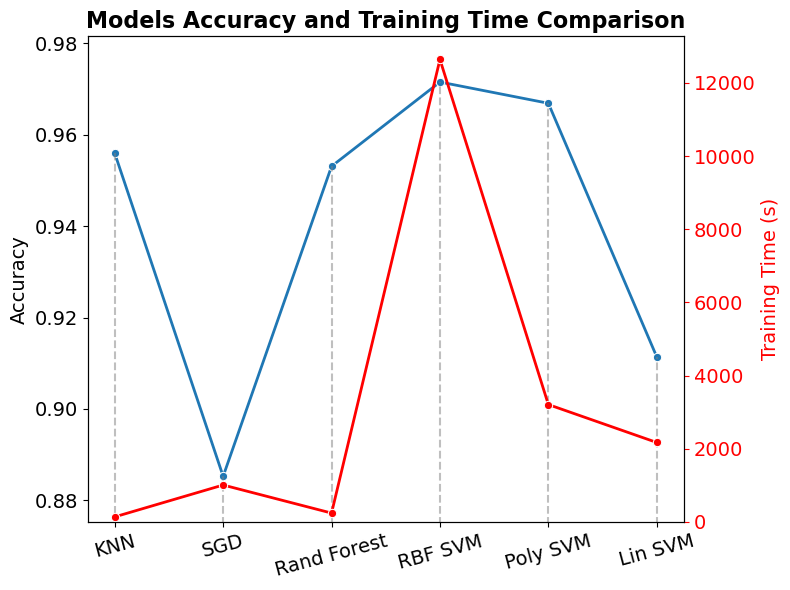

In [336]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

models = ['KNN', 'SGD', 'Rand Forest', 'RBF SVM', 'Poly SVM', 'Lin SVM']
accuracy_values = [
    best_models_summary['knn_random_search']['best_accuracy_value'], 
    best_models_summary['sgd_random_search']['best_accuracy_value'], 
    best_models_summary['forest_clf_random_search']['best_accuracy_value'], 
    best_models_summary['svm_rbf_random_search']['best_accuracy_value'], 
    best_models_summary['svm_poly_random_search']['best_accuracy_value'], 
    best_models_summary['svm_lin_random_search']['best_accuracy_value']
]

training_times = [140.36, 1010.8, 243.77, 12641.21, 3209.58, 2173.22]

data = {
    'Model': models,
    'Accuracy': accuracy_values,
    'Training Time': training_times
}

df = pd.DataFrame(data)

plt.figure(figsize=(8, 6))
ax = sns.lineplot(x='Model', y='Accuracy', data=df, marker='o', linewidth=2)

# dotted lines
for i, model in enumerate(models):
    ax.plot([i, i], [0, accuracy_values[i]], color='gray', linestyle='--', alpha=0.5)

plt.title('Models Accuracy and Training Time Comparison', fontsize=16, color='black', weight='bold')
plt.xlabel('', fontsize=14)
ax.set_ylabel('Accuracy', fontsize=14)
plt.xticks(rotation=15)

accuracy_min = min(accuracy_values) - 0.01
accuracy_max = max(accuracy_values) + 0.01
ax.set_ylim(accuracy_min, accuracy_max)

ax.tick_params(axis='x', labelsize=14)
ax.tick_params(axis='y', labelsize=14)

ax2 = ax.twinx()
sns.lineplot(x='Model', y='Training Time', data=df, marker='o', color='red', linewidth=2, ax=ax2)

ax2.set_ylabel('Training Time (s)', fontsize=14, color='red')
ax2.set_ylim(0, max(training_times) * 1.05)

ax2.tick_params(axis='y', labelsize=14, colors='red')  # For training times

plt.tight_layout()
plt.savefig('accuracy_and_time.png')
plt.show()


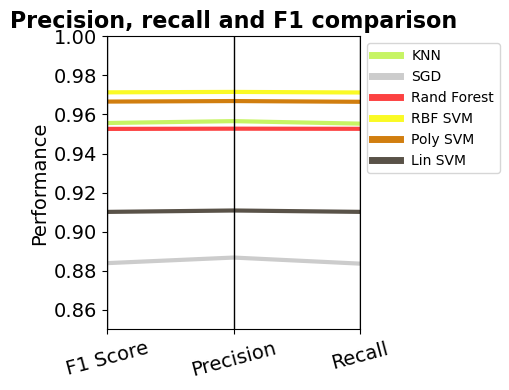

In [338]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates

models = ['KNN', 'SGD', 'Rand Forest', 'RBF SVM', 'Poly SVM', 'Lin SVM']
metrics = ['Precision', 'Recall', 'F1 Score']

data = {
    'Model': np.repeat(models, 3),
    'Metric': metrics * len(models),
    'Value': [
        best_models_summary['knn_random_search']['best_precision_value'], 
        best_models_summary['knn_random_search']['best_recall_value'], 
        best_models_summary['knn_random_search']['best_f1_value'],
        best_models_summary['sgd_random_search']['best_precision_value'], 
        best_models_summary['sgd_random_search']['best_recall_value'], 
        best_models_summary['sgd_random_search']['best_f1_value'],
        best_models_summary['forest_clf_random_search']['best_precision_value'], 
        best_models_summary['forest_clf_random_search']['best_recall_value'], 
        best_models_summary['forest_clf_random_search']['best_f1_value'],
        best_models_summary['svm_rbf_random_search']['best_precision_value'], 
        best_models_summary['svm_rbf_random_search']['best_recall_value'], 
        best_models_summary['svm_rbf_random_search']['best_f1_value'],
        best_models_summary['svm_poly_random_search']['best_precision_value'], 
        best_models_summary['svm_poly_random_search']['best_recall_value'], 
        best_models_summary['svm_poly_random_search']['best_f1_value'],
        best_models_summary['svm_lin_random_search']['best_precision_value'], 
        best_models_summary['svm_lin_random_search']['best_recall_value'], 
        best_models_summary['svm_lin_random_search']['best_f1_value']
    ]
}

df = pd.DataFrame(data)

df_pivot = df.pivot(index='Model', columns='Metric', values='Value').reset_index()

model_order = ['KNN', 'SGD', 'Rand Forest', 'RBF SVM', 'Poly SVM', 'Lin SVM']
df_pivot['Model'] = pd.Categorical(df_pivot['Model'], categories=model_order, ordered=True)
df_pivot = df_pivot.sort_values('Model').reset_index(drop=True)

plt.figure(figsize=(5, 4))
parallel_coordinates(df_pivot, 'Model', color=('#C7F464', '#CCCCCC', '#FC4242', '#FAFA25', '#D17E0F', '#595248'), linewidth=3)

plt.title('Precision, recall and F1 comparison',fontsize=16, color='black', weight='bold')
plt.ylabel('Performance', fontsize=14)
plt.xlabel('', fontsize=14)
plt.xticks(rotation=15, fontsize=14)
plt.yticks(fontsize=14)
plt.ylim(0.85, 1.0)

handles = [plt.Line2D([0], [0], color='#C7F464', lw=5),
           plt.Line2D([0], [0], color='#CCCCCC', lw=5),
           plt.Line2D([0], [0], color='#FC4242', lw=5),
           plt.Line2D([0], [0], color='#FAFA25', lw=5),
           plt.Line2D([0], [0], color='#D17E0F', lw=5),
           plt.Line2D([0], [0], color='#595248', lw=5)]

plt.legend(handles, models, loc='upper left', bbox_to_anchor=(1, 1), fontsize=10)

plt.grid()
plt.tight_layout()
plt.savefig('precision_recall_f1_comparison.png')
plt.show()


In [328]:
import joblib
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

svm_rbf_random_search = joblib.load('svm_rbf_random_search.pkl')

y_pred_subset = svm_rbf_random_search.predict(X_test_subset)

accuracy = accuracy_score(y_test_subset, y_pred_subset)
precision = precision_score(y_test_subset, y_pred_subset, average='macro')
recall = recall_score(y_test_subset, y_pred_subset, average='macro')
f1 = f1_score(y_test_subset, y_pred_subset, average='macro')

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.4f}')


C:\Users\OMID\anaconda3\Lib\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator SVC from version 1.5.2 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
C:\Users\OMID\anaconda3\Lib\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator RandomizedSearchCV from version 1.5.2 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


Accuracy: 0.9743
Precision: 0.9743
Recall: 0.97
F1 Score: 0.9741
